In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import openai
import os

from io import StringIO
from datetime import datetime, timedelta

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

pd.set_option('display.max_columns', None)

# date for past 60 days
end_date = datetime.today()
start_date = end_date - timedelta(days=60)

# format dates for display
start_date = start_date.strftime('%m/%d/%Y')
end_date = end_date.strftime('%m/%d/%Y')

Astra         23
Breach        60
Brimstone      8
Chamber        5
Cypher       103
Deadlock      15
Fade          18
Gekko         23
Harbor         0
Jett          50
KAY/O         30
Killjoy       24
Neon          79
Omen         106
Phoenix        1
Raze          37
Reyna          3
Sage           0
Skye          14
Sova         125
Viper         21
Yoru          19
dtype: int64


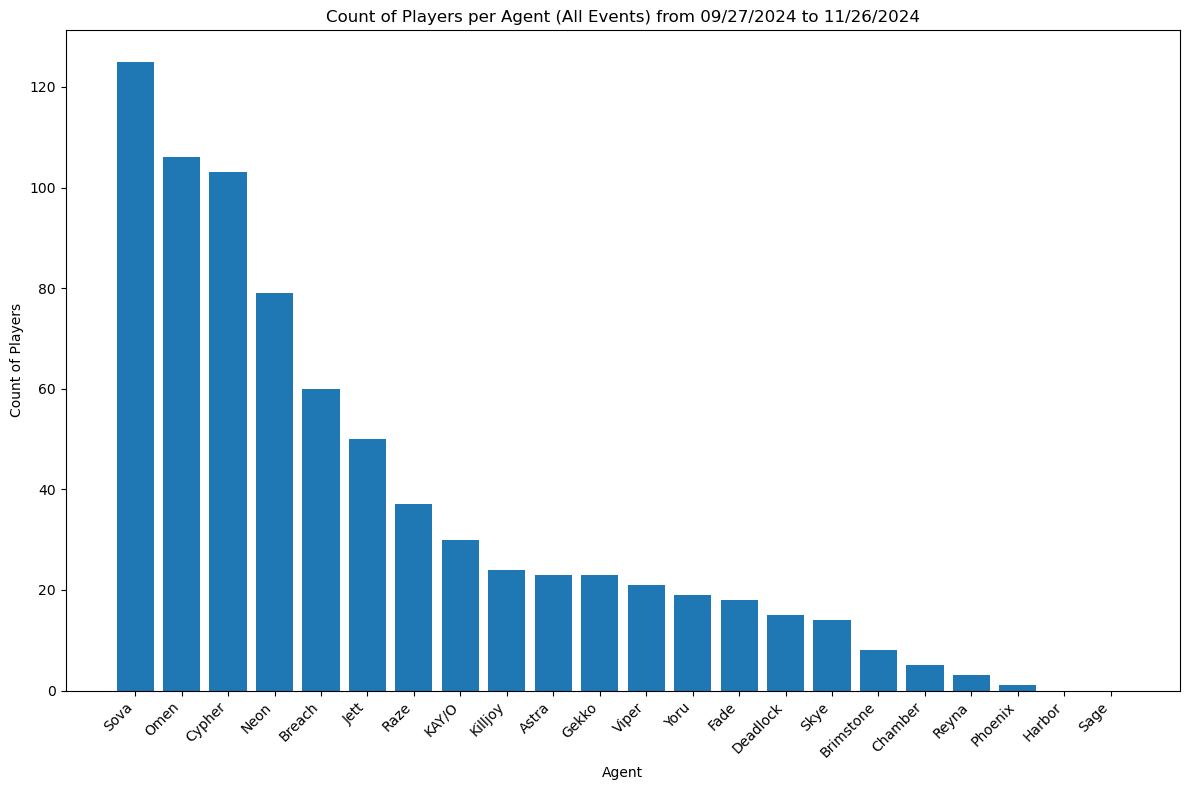

In [2]:
# scrape data
driver = webdriver.Chrome()

driver.get("https://www.vlr.gg/stats")
stats_table = driver.find_element(By.XPATH, "//table[1]")

html_data = StringIO(stats_table.get_attribute("outerHTML"))
df = pd.read_html(html_data)

stats = df[0]
stats_all = stats

# For all 24 Agents
agents_all = [
    ('Astra', 'https://www.vlr.gg/stats/?event_group_id=all&event_id=all&region=all&min_rounds=100&min_rating=1550&agent=astra&map_id=all&timespan=60d'),
    ('Breach', 'https://www.vlr.gg/stats/?event_group_id=all&event_id=all&region=all&min_rounds=100&min_rating=1550&agent=breach&map_id=all&timespan=60d'),
    ('Brimstone', 'https://www.vlr.gg/stats/?event_group_id=all&event_id=all&region=all&min_rounds=100&min_rating=1550&agent=brimstone&map_id=all&timespan=60d'),
    ('Chamber', 'https://www.vlr.gg/stats/?event_group_id=all&event_id=all&region=all&min_rounds=100&min_rating=1550&agent=chamber&map_id=all&timespan=60d'),
    ('Cypher', 'https://www.vlr.gg/stats/?event_group_id=all&event_id=all&region=all&min_rounds=100&min_rating=1550&agent=cypher&map_id=all&timespan=60d'),
    ('Deadlock', 'https://www.vlr.gg/stats/?event_group_id=all&event_id=all&region=all&min_rounds=100&min_rating=1550&agent=deadlock&map_id=all&timespan=60d'),
    ('Fade', 'https://www.vlr.gg/stats/?event_group_id=all&event_id=all&region=all&min_rounds=100&min_rating=1550&agent=fade&map_id=all&timespan=60d'),
    ('Gekko', 'https://www.vlr.gg/stats/?event_group_id=all&event_id=all&region=all&min_rounds=100&min_rating=1550&agent=gekko&map_id=all&timespan=60d'),
    ('Harbor', 'https://www.vlr.gg/stats/?event_group_id=all&event_id=all&region=all&min_rounds=100&min_rating=1550&agent=harbor&map_id=all&timespan=60d'),
    ('Jett', 'https://www.vlr.gg/stats/?event_group_id=all&event_id=all&region=all&min_rounds=100&min_rating=1550&agent=jett&map_id=all&timespan=60d'),
    ('KAY/O', 'https://www.vlr.gg/stats/?event_group_id=all&event_id=all&region=all&min_rounds=100&min_rating=1550&agent=kayo&map_id=all&timespan=60d'),
    ('Killjoy', 'https://www.vlr.gg/stats/?event_group_id=all&event_id=all&region=all&min_rounds=100&min_rating=1550&agent=killjoy&map_id=all&timespan=60d'),
    ('Neon', 'https://www.vlr.gg/stats/?event_group_id=all&event_id=all&region=all&min_rounds=100&min_rating=1550&agent=neon&map_id=all&timespan=60d'),
    ('Omen', 'https://www.vlr.gg/stats/?event_group_id=all&event_id=all&region=all&min_rounds=100&min_rating=1550&agent=omen&map_id=all&timespan=60d'),
    ('Phoenix', 'https://www.vlr.gg/stats/?event_group_id=all&event_id=all&region=all&min_rounds=100&min_rating=1550&agent=phoenix&map_id=all&timespan=60d'),
    ('Raze', 'https://www.vlr.gg/stats/?event_group_id=all&event_id=all&region=all&min_rounds=100&min_rating=1550&agent=raze&map_id=all&timespan=60d'),
    ('Reyna', 'https://www.vlr.gg/stats/?event_group_id=all&event_id=all&region=all&min_rounds=100&min_rating=1550&agent=reyna&map_id=all&timespan=60d'),
    ('Sage', 'https://www.vlr.gg/stats/?event_group_id=all&event_id=all&region=all&min_rounds=100&min_rating=1550&agent=sage&map_id=all&timespan=60d'),
    ('Skye', 'https://www.vlr.gg/stats/?event_group_id=all&event_id=all&region=all&min_rounds=100&min_rating=1550&agent=skye&map_id=all&timespan=60d'),
    ('Sova', 'https://www.vlr.gg/stats/?event_group_id=all&event_id=all&region=all&min_rounds=100&min_rating=1550&agent=sova&map_id=all&timespan=60d'),
    ('Viper', 'https://www.vlr.gg/stats/?event_group_id=all&event_id=all&region=all&min_rounds=100&min_rating=1550&agent=viper&map_id=all&timespan=60d'),
    ('Yoru', 'https://www.vlr.gg/stats/?event_group_id=all&event_id=all&region=all&min_rounds=100&min_rating=1550&agent=yoru&map_id=all&timespan=60d')
]

for agent_name, agent_url in agents_all:
    # go to the agent URL
    driver.get(agent_url)

    # load that bad boi in
    stats_tableFN = driver.find_element(By.XPATH, "//table[1]")
    html_dataFN = StringIO(stats_tableFN.get_attribute("outerHTML"))
    agent_df = pd.read_html(html_dataFN)[0]
    
    # add a new column in the main stats DataFrame for the agent
    # "1" if the player is in the agent's DataFrame, "0" if not
    stats_all[agent_name] = stats_all['Player'].apply(lambda player: 1 if player in agent_df['Player'].values else 0)

# sum each agent column to get the count of players who play each agent
agent_names = [agent[0] for agent in agents_all]
agent_counts_all = stats_all[agent_names].sum()

print(agent_counts_all)

agent_counts_all = agent_counts_all.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(agent_counts_all.index, agent_counts_all.values)
plt.xlabel("Agent")
plt.ylabel("Count of Players")
plt.title(f"Count of Players per Agent (All Events) from {start_date} to {end_date}")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plot_all = plt
plot_all.show()

In [39]:
# List of all agents
agent_columns = [
    'Astra', 'Breach', 'Brimstone', 'Chamber', 'Cypher', 'Deadlock',
    'Fade', 'Gekko', 'Harbor', 'Jett', 'KAY/O', 'Killjoy', 'Neon',
    'Omen', 'Phoenix', 'Raze', 'Reyna', 'Sage', 'Skye', 'Sova',
    'Viper', 'Yoru'
]

# Include all relevant stats in id_vars
id_vars = [
    'Player', 'Rnd', 'R2.0', 'ACS', 'K:D', 'KAST', 'ADR', 'KPR', 'APR',
    'FKPR', 'FDPR', 'HS%', 'CL%', 'KMax', 'K', 'D', 'A', 'FK', 'FD'
]

# Reshape the dataset to a long format using melt
all_player_agents = stats_all.melt(
    id_vars=id_vars,  # Keep all relevant columns
    value_vars=agent_columns,  # Reshape the agent columns
    var_name='Agent',  # New column to indicate the agent name
    value_name='Played'  # New column to indicate if the agent was played
)

# Filter for rows where the player used the agent (Played = 1)
all_player_agents = all_player_agents[all_player_agents['Played'] == 1]

# Drop the 'Played' column since it's no longer needed
all_player_agents = all_player_agents.drop(columns=['Played'])

print(all_player_agents)

                Player  Rnd  R2.0    ACS   K:D KAST    ADR   KPR   APR  FKPR  \
18           Spaz  MxS  765  1.24  215.0  1.25  78%  136.9  0.74  0.50  0.07   
22           tixx  JJH  341  1.23  243.3  1.27  80%  154.8  0.83  0.47  0.13   
54           bang  SEN  233  1.16  213.4  1.18  77%  141.0  0.78  0.38  0.06   
124    seph1roth  MITH  499  1.09  193.2  1.16  77%  125.4  0.72  0.32  0.08   
158       shirazi  XIP  430  1.07  191.8  1.09  78%  128.3  0.66  0.35  0.07   
...                ...  ...   ...    ...   ...  ...    ...   ...   ...   ...   
13612    Jerrwin  PLUG  920  0.99  237.0  1.04  68%  151.9  0.81  0.24  0.18   
13628           Envy2K  312  0.98  231.5  1.00  62%  144.6  0.79  0.19  0.18   
13640     CRUNCH  Illu  792  0.98  220.6  0.99  67%  148.3  0.77  0.19  0.18   
13668   ScrewFace  AMB  633  0.96  191.3  0.95  71%  128.9  0.65  0.31  0.11   
13716    Klamran  ROSE  749  0.94  189.3  0.96  69%  126.3  0.68  0.21  0.09   

       FDPR  HS%  CL%  KMax    K    D  

In [41]:
# Convert percentage columns to numeric
percentage_columns = ['KAST', 'CL%', 'HS%']
for col in percentage_columns:
    if col in all_player_agents.columns:
        all_player_agents[col] = (
            all_player_agents[col]
            .str.rstrip('%')  # Remove the '%' character
            .astype(float)  # Convert to float
            / 100  # Convert to fraction
        )

print(all_player_agents.head())

              Player  Rnd  R2.0    ACS   K:D  KAST    ADR   KPR   APR  FKPR  \
18         Spaz  MxS  765  1.24  215.0  1.25  0.78  136.9  0.74  0.50  0.07   
22         tixx  JJH  341  1.23  243.3  1.27  0.80  154.8  0.83  0.47  0.13   
54         bang  SEN  233  1.16  213.4  1.18  0.77  141.0  0.78  0.38  0.06   
124  seph1roth  MITH  499  1.09  193.2  1.16  0.77  125.4  0.72  0.32  0.08   
158     shirazi  XIP  430  1.07  191.8  1.09  0.78  128.3  0.66  0.35  0.07   

     FDPR   HS%   CL%  KMax    K    D    A  FK  FD  Agent  
18   0.06  0.22  0.22    26  569  456  386  52  48  Astra  
22   0.05  0.32  0.20    26  284  223  161  45  17  Astra  
54   0.09  0.36  0.13    30  181  153   89  14  22  Astra  
124  0.06  0.34  0.24    28  357  308  161  42  32  Astra  
158  0.07  0.20  0.17    24  284  260  149  28  29  Astra  


In [43]:
# Convert all other numeric columns to appropriate types
numeric_columns = [
    'Rnd', 'R2.0', 'ACS', 'K:D', 'ADR', 'KPR', 'FKPR', 'FDPR',
    'CL', 'KMax', 'K', 'D', 'A', 'FK', 'FD'
]
for col in numeric_columns:
    if col in all_player_agents.columns:
        all_player_agents[col] = pd.to_numeric(all_player_agents[col], errors='coerce')

print(all_player_agents.head())

              Player  Rnd  R2.0    ACS   K:D  KAST    ADR   KPR   APR  FKPR  \
18         Spaz  MxS  765  1.24  215.0  1.25  0.78  136.9  0.74  0.50  0.07   
22         tixx  JJH  341  1.23  243.3  1.27  0.80  154.8  0.83  0.47  0.13   
54         bang  SEN  233  1.16  213.4  1.18  0.77  141.0  0.78  0.38  0.06   
124  seph1roth  MITH  499  1.09  193.2  1.16  0.77  125.4  0.72  0.32  0.08   
158     shirazi  XIP  430  1.07  191.8  1.09  0.78  128.3  0.66  0.35  0.07   

     FDPR   HS%   CL%  KMax    K    D    A  FK  FD  Agent  
18   0.06  0.22  0.22    26  569  456  386  52  48  Astra  
22   0.05  0.32  0.20    26  284  223  161  45  17  Astra  
54   0.09  0.36  0.13    30  181  153   89  14  22  Astra  
124  0.06  0.34  0.24    28  357  308  161  42  32  Astra  
158  0.07  0.20  0.17    24  284  260  149  28  29  Astra  


In [73]:
# Define thresholds for role assignment
entry_frag_thresholds = {'FKPR': 0.18, 'FDPR': 0.14}  # slightly relaxed
carry_thresholds = {'K:D': 1.25, 'ACS': 210}        # slightly relaxed
support_thresholds = {'APR': 0.25, 'KAST': 0.7}
clutch_thresholds = {'CL%': 0.15, 'FDPR': 0.1}

# Add columns for each role
all_player_agents['EntryFrag'] = (
    (all_player_agents['FKPR'] >= entry_frag_thresholds['FKPR']) &
    (all_player_agents['FDPR'] >= entry_frag_thresholds['FDPR'])
).astype(int)

all_player_agents['Support'] = (
    (all_player_agents['APR'] >= support_thresholds['APR']) &
    (all_player_agents['KAST'] >= support_thresholds['KAST'])
).astype(int)

all_player_agents['Carry'] = (
    (all_player_agents['K:D'] >= carry_thresholds['K:D']) &
    (all_player_agents['ACS'] >= carry_thresholds['ACS'])
).astype(int)

all_player_agents['Clutch'] = (
    (all_player_agents['CL%'] >= clutch_thresholds['CL%']) &
    (all_player_agents['FDPR'] <= clutch_thresholds['FDPR'])
).astype(int)

# Preview the dataset with role columns
print(all_player_agents[['Player', 'Agent', 'EntryFrag', 'Support', 'Carry', 'Clutch']].head())


              Player  Agent  EntryFrag  Support  Carry  Clutch
18         Spaz  MxS  Astra          0        1      1       1
22         tixx  JJH  Astra          0        1      1       1
54         bang  SEN  Astra          0        1      0       0
124  seph1roth  MITH  Astra          0        1      0       1
158     shirazi  XIP  Astra          0        1      0       1


In [75]:
# Prepare data for ML
X = all_player_agents[selected_metrics]  # Features
y = all_player_agents[['EntryFrag', 'Support', 'Carry', 'Clutch']]  # Target roles

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Role Assignment Model Evaluation:")
print(classification_report(y_test, y_pred, target_names=y.columns))


Role Assignment Model Evaluation:
              precision    recall  f1-score   support

   EntryFrag       1.00      1.00      1.00        23
     Support       1.00      0.98      0.99       102
       Carry       1.00      0.86      0.92        14
      Clutch       1.00      1.00      1.00        79

   micro avg       1.00      0.98      0.99       218
   macro avg       1.00      0.96      0.98       218
weighted avg       1.00      0.98      0.99       218
 samples avg       0.67      0.67      0.67       218



C:\Users\HELIOS-300\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HELIOS-300\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HELIOS-300\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


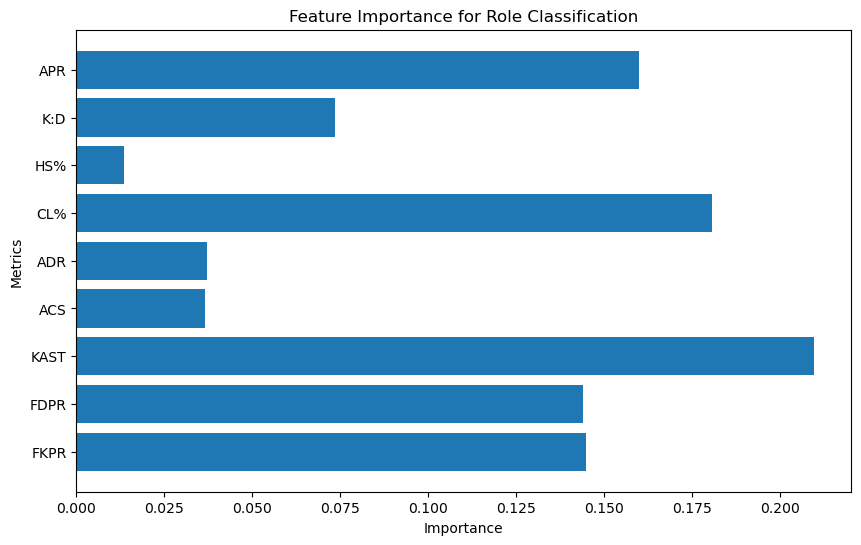

In [71]:
# Extract feature importance from the Random Forest model

feature_importance = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(selected_metrics, feature_importance)
plt.title("Feature Importance for Role Classification")
plt.xlabel("Importance")
plt.ylabel("Metrics")
plt.show()


In [85]:
# Define role-specific metrics
role_metrics = {
    'EntryFrag': ['FKPR', 'FDPR'],        # First Kill and First Death per Round
    'Support': ['APR', 'KAST'],          # Assists and Team Impact
    'Fragger': ['K:D', 'ACS'],           # Kill-to-Death Ratio and Combat Score
    'Clutch': ['CL%', 'FDPR']            # Clutch Percentage and First Death per Round
}

# Define weights for metrics in each role (adjust as necessary)
role_weights = {
    'EntryFrag': {'FKPR': 0.7, 'FDPR': 0.3},  # More weight on FKPR
    'Support': {'APR': 0.5, 'KAST': 0.5},     # Equal weight
    'Fragger': {'K:D': 0.6, 'ACS': 0.4},      # More weight on K:D
    'Clutch': {'CL%': 0.8, 'FDPR': 0.2}       # More weight on clutch success
}

# Normalize metrics across the dataset
scaler = MinMaxScaler()
normalized_stats = all_player_agents.copy()

for role, metrics in role_metrics.items():
    for metric in metrics:
        if metric in all_player_agents.columns:
            normalized_stats[metric] = scaler.fit_transform(all_player_agents[[metric]])

# Calculate performance ratings for each role
for role, metrics in role_metrics.items():
    # Initialize the role rating column with zeros
    all_player_agents[f'{role}_Rating'] = 0
    
    # Add weighted contributions of each metric to the role rating
    for metric, weight in role_weights[role].items():
        all_player_agents[f'{role}_Rating'] += normalized_stats[metric] * weight

# Scale role ratings between 0 and 1
for role in role_metrics.keys():
    all_player_agents[f'{role}_Rating'] = scaler.fit_transform(all_player_agents[[f'{role}_Rating']])

# Display performance ratings for players
print(all_player_agents[['Player', 'Agent', 'EntryFrag_Rating', 'Support_Rating', 'Fragger_Rating', 'Clutch_Rating']].head())


              Player  Agent  EntryFrag_Rating  Support_Rating  Fragger_Rating  \
18         Spaz  MxS  Astra          0.253115        0.872338        0.590357   
22         tixx  JJH  Astra          0.392640        0.854694        0.671302   
54         bang  SEN  Astra          0.265575        0.741651        0.547874   
124  seph1roth  MITH  Astra          0.278470        0.679647        0.486946   
158     shirazi  XIP  Astra          0.265720        0.717328        0.444958   

     Clutch_Rating  
18        0.586365  
22        0.528788  
54        0.397735  
124       0.634546  
158       0.475307  
